### Feature Engineering: Outlier, Z score and Standard Deviation

**bhp.csv file  which contains property prices in the city of banglore,India.**

- You need to examine price_per_sqft column and do following <br>
(1)Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers.

- This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

- from above you can see max is 12000000, which is too much price for price per sqft. 
- Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score.

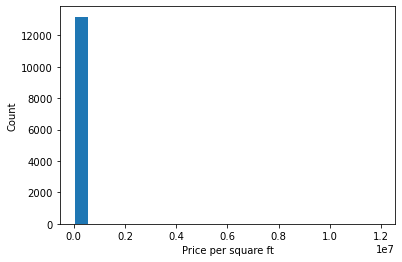

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

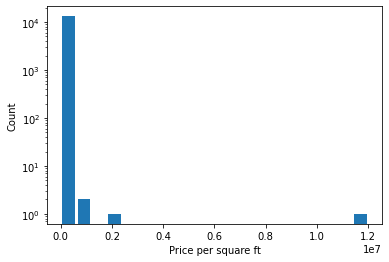

In [5]:
#Use log scale to make visualization better
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

## Treat outliers using percentile first

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [7]:
outliers = df[(df.price_per_sqft > upper_limit) | (df.price_per_sqft < lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
1005,other,1 BHK,15.0,1.0,30.0,1,200000
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
7012,other,1 BHK,650.0,1.0,500.0,1,76923
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250


- Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. 
- You would be very lucky if you can find such as property.
- Also we have properties that has price per sqft value such as 12000000 which is way too high. 
- It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point.

In [8]:
df2 = df[(df.price_per_sqft < upper_limit) & (df.price_per_sqft > lower_limit)]
df2.shape

(13172, 7)

In [9]:
df.shape

(13200, 7)

In [10]:
df.shape[0] - df2.shape[0]

28

**Removed total 28 outliers**

## Remove outliers using 4 standard deviation

In [11]:
max_limit = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [12]:
df2[(df2.price_per_sqft > max_limit) | (df2.price_per_sqft < min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9808,Uttarahalli,6 Bedroom,1200.00,6.0,330.0,6,27500
11838,Vijayanagar,4 Bedroom,1500.00,4.0,360.0,4,24000
5639,other,3 BHK,2777.29,5.0,650.0,3,23404
7561,KR Puram,8 Bedroom,1500.00,7.0,382.0,8,25466
4993,other,6 Bedroom,825.00,6.0,400.0,6,48484
12393,Electronic City Phase II,1 BHK,1200.00,1.0,295.0,1,24583
8083,other,3 BHK,2750.00,3.0,943.0,3,34290
1795,2nd Stage Nagarbhavi,5 Bedroom,1200.00,4.0,285.0,5,23750
2825,HBR Layout,9 Bedroom,1200.00,6.0,280.0,9,23333
6134,Basavangudi,6 Bedroom,1754.00,6.0,650.0,6,37058


In [13]:
df3 = df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]
df3.shape

(13047, 7)

In [14]:
df2.shape[0] - df3.shape[0]

125

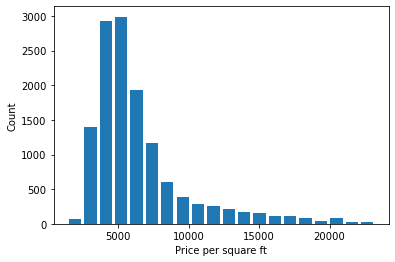

In [15]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

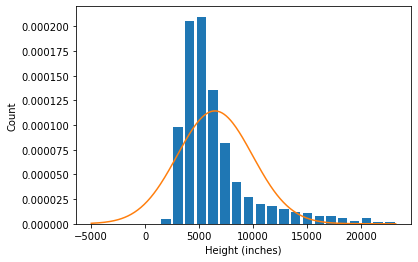

In [16]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

# Remove outliers using z score. Use Z score of 4 as your thresold.

In [17]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.sample(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3952\2329352600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean()) / df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9079,other,3 BHK,2048.0,3.0,206.0,3,10058,0.819688
11530,other,2 BHK,1040.0,2.0,36.4,2,3500,-0.763979
9858,Electronic City,4 Bedroom,1800.0,3.0,190.0,4,10555,0.939707
8795,Kanakpura Road,1 BHK,381.0,1.0,28.0,1,7349,0.165502
4036,Whitefield,3 BHK,3480.0,4.0,284.0,3,8160,0.361347
12123,other,4 Bedroom,600.0,3.0,95.0,4,15833,2.214272
7572,Electronic City Phase II,2 BHK,1286.0,2.0,69.0,2,5365,-0.313607
8898,Old Madras Road,3 BHK,1350.0,3.0,45.9,3,3400,-0.788128
8849,other,3 BHK,2250.0,3.0,180.0,3,8000,0.322709
936,Koramangala,4 BHK,3500.0,5.0,425.0,4,12142,1.322946


In [18]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [19]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
6109,HRBR Layout,6 Bedroom,1000.0,6.0,275.0,6,27500,5.031693
8083,other,3 BHK,2750.0,3.0,943.0,3,34290,6.671386
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
7561,KR Puram,8 Bedroom,1500.0,7.0,382.0,8,25466,4.540510


In [20]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

(13047, 8)

In [21]:
df2.shape[0] - df4.shape[0]

125

### Removed 125 outliers. The result would be exactly same as 4 standard deviation.